In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import math
from scipy.stats import variation
%matplotlib inline
warnings.filterwarnings('ignore')
sns.set_style("darkgrid")
import sklearn
from sklearn.metrics import mean_squared_error

In [2]:
df  = pd.read_csv('GlobalSuperstoredata.csv', encoding='latin1',parse_dates=['Order Date'])

In [3]:
df

Order Date      Segment  Market     Sales    Profit
0     2012-07-31     Consumer      US  2309.650  762.1845
1     2013-05-02    Corporate    APAC  3709.395 -288.7650
2     2013-10-17     Consumer    APAC  5175.171  919.9710
3     2013-01-28  Home Office      EU  2892.510  -96.5400
4     2013-05-11     Consumer  Africa  2832.960  311.5200
...          ...          ...     ...       ...       ...
51285 2014-06-19    Corporate    APAC    65.100    4.5000
51286 2014-06-20     Consumer      US     0.444   -1.1100
51287 2013-02-12  Home Office      US    22.920   11.2308
51288 2012-02-18  Home Office   LATAM    13.440    2.4000
51289 2012-05-22     Consumer   LATAM    61.380    1.8000

[51290 rows x 5 columns]

In [4]:
import plotly.express as px

In [5]:
print(df.shape)
print('\n')
print(df.columns)
print('\n')
print(df.info())
print('\n')
print(df.describe())

(51290, 5)


Index(['Order Date', 'Segment', 'Market', 'Sales', 'Profit'], dtype='object')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Order Date  51290 non-null  datetime64[ns]
 1   Segment     51290 non-null  object        
 2   Market      51290 non-null  object        
 3   Sales       51290 non-null  float64       
 4   Profit      51290 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 2.0+ MB
None


              Sales        Profit
count  51290.000000  51290.000000
mean     246.490581     28.610982
std      487.565361    174.340972
min        0.444000  -6599.978000
25%       30.758625      0.000000
50%       85.053000      9.240000
75%      251.053200     36.810000
max    22638.480000   8399.976000


In [6]:
df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

Sales        Profit
count  51290.000000  51290.000000
mean     246.490581     28.610982
std      487.565361    174.340972
min        0.444000  -6599.978000
25%       30.758625      0.000000
50%       85.053000      9.240000
75%      251.053200     36.810000
90%      632.225736    112.680000
95%     1015.955640    211.500000
99%     2301.000000    587.359950
max    22638.480000   8399.976000

Text(0, 0.5, 'Count')

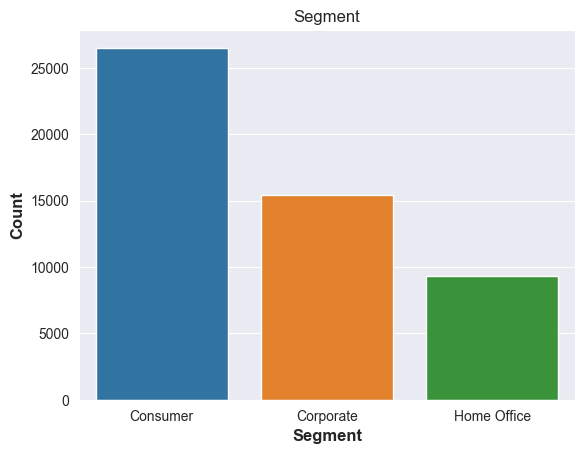

In [7]:
#draw a  value count plot for the categorical columns using the seaborn library

sns.countplot(x='Segment',data=df)
plt.title('Segment')
plt.xlabel('Segment', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')


In [8]:
#create a count plot using the plotly express library

fig = px.histogram(df, x="Segment", title='Segment')
fig.show()

In [9]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Pie(labels=df['Segment'], values=df['Sales'], hole=.3)])
fig.update_layout(title='Segment',title_x=0.5,font=dict(family="Courier New, monospace",size=18,color="#7f7f7f"))
                

In [10]:
# draw a bar chart of count of each Segments and  in each Segment display the count of each Market in plotly express the Market column is a categorical column and should be side by side

fig = px.histogram(df, x="Market", color="Segment",barmode='group',title='Segment')

fig.show()

In [115]:
#group the data by the region and further resample it by month and year and then sum the sales

df_temp = df.groupby('Market').resample('M', on='Order Date').mean()


#draw a line plot of the sales in each region by month and year using the plotly

df_temp


Sales     Profit
Market Order Date                       
APAC   2011-01-31  272.394086  22.009800
       2011-02-28  356.179944  57.442671
       2011-03-31  295.676966  39.349513
       2011-04-30  255.439713  13.693219
       2011-05-31  333.574686  39.439924
...                       ...        ...
US     2014-08-31  294.436156  28.697450
       2014-09-30  217.899770  34.585840
       2014-10-31  238.881305  28.606265
       2014-11-30  228.291575  24.966448
       2014-12-31  174.681773  25.697987

[336 rows x 2 columns]

In [116]:
#get all the unique values in the Market column



In [117]:
#get all the data of 'APAC' region from the df_temp 
type(df_temp.loc['APAC'])

fig =  go.Figure()


for market in df_temp.index.get_level_values(0).unique():
   temp = df_temp.loc[market]
   fig.add_trace(go.Scatter(x=temp.index, y=temp['Sales'], name=market))

fig.update_layout(title='Sales by Region',title_x=0.5,font=dict(family="Courier New, monospace",size=18,color="#7f7f7f"))
fig.show()

In [118]:
#take 3 market regions 
sel_list = ['APAC','EU','US']

df_temp =  df_temp.loc[df_temp.index.get_level_values(0).isin(sel_list)]   

df_temp 

Sales     Profit
Market Order Date                       
APAC   2011-01-31  272.394086  22.009800
       2011-02-28  356.179944  57.442671
       2011-03-31  295.676966  39.349513
       2011-04-30  255.439713  13.693219
       2011-05-31  333.574686  39.439924
...                       ...        ...
US     2014-08-31  294.436156  28.697450
       2014-09-30  217.899770  34.585840
       2014-10-31  238.881305  28.606265
       2014-11-30  228.291575  24.966448
       2014-12-31  174.681773  25.697987

[144 rows x 2 columns]

In [119]:
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit()
train_data =  pd.DataFrame()
test_data =  pd.DataFrame()

for market in df_temp.index.get_level_values(0).unique():
    #create a temp dataframe 
    temp = df_temp[df_temp.index.get_level_values(0)==market]
    #take last 6 months data as test data and rest as train data
    #get the max date from the index
    max_date = max(temp.index.get_level_values(1))
    cut_off_date = max_date - pd.DateOffset(months=6)
    train = temp[temp.index.get_level_values(1) <= cut_off_date]
    test = temp[temp.index.get_level_values(1) > cut_off_date]
    train_data = pd.concat([train_data,train])
    test_data = pd.concat([test_data,test])
        
    


In [120]:
train_data.to_csv('train_data.csv')
test_data.to_csv('test_data.csv')

In [121]:
#using naive approach for forecasting

#take the mean of the last 6 months sales  of train data and assign it to the test data  on each Market

for market in train_data.index.get_level_values(0).unique():
    #create a temp dataframe 
    temp = train_data[train_data.index.get_level_values(0)==market]
    #get the value of the last month sales
    last_month_sales = temp.iloc[-1]['Sales']
    #assign the last month sales to the test data
    test_data.loc[market,'Naive_Sales'] = last_month_sales

In [122]:
test_data

Sales     Profit  Naive_Sales
Market Order Date                                    
APAC   2014-07-31  366.718993  33.430395   309.113728
       2014-08-31  315.307917  19.581425   309.113728
       2014-09-30  326.050921  49.545431   309.113728
       2014-10-31  301.431439  42.799755   309.113728
       2014-11-30  330.305108  50.863975   309.113728
       2014-12-31  290.720951  27.255736   309.113728
EU     2014-07-31  286.696557  24.680466   308.841441
       2014-08-31  305.600285  44.222965   308.841441
       2014-09-30  300.332675  34.845659   308.841441
       2014-10-31  267.087016  43.738924   308.841441
       2014-11-30  320.421602  26.196758   308.841441
       2014-12-31  287.378273  38.063800   308.841441
US     2014-07-31  186.020054  26.273904   205.258623
       2014-08-31  294.436156  28.697450   205.258623
       2014-09-30  217.899770  34.585840   205.258623
       2014-10-31  238.881305  28.606265   205.258623
       2014-11-30  228.291575  24.966448   205.258623
       2014-12-31  174.681773  25.697987   205.258623

In [123]:
#plott the actual sales and the forecasted sales

fig =  go.Figure()

i =0

for market in test_data.index.get_level_values(0).unique():
 
    temp_train = train_data.loc[market]
    temp_test = test_data.loc[market]
    #add last value of the train data to the first value of the test data so that the line is continuous
    temp_test = pd.concat([pd.DataFrame(temp_train.iloc[-1]).transpose(),temp_test])
     #copy the sales value of first row to the Naive_Sales column
    temp_train  =  df_temp.loc[market]
    temp_test['Naive_Sales'][0] = temp_test['Sales'][0]
    #add duplicate values for the train data so that the line is continuous
    fig.add_trace(go.Scatter(x=temp_train.index, y=temp_train['Sales'], name=market,mode='lines',line_color= px.colors.qualitative.Plotly[i],line=dict(width=2)))
    fig.add_trace(go.Scatter(x=temp_test.index, y=temp_test['Naive_Sales'], name=f"{market} predicted",mode='lines',line=dict( dash='dash'),line_color=px.colors.qualitative.Plotly[i]))
    i = i+1
fig.update_layout(title='Sales by Region',title_x=0.5,font=dict(family="Courier New, monospace",size=18,color="#7f7f7f"))

fig.show()

In [124]:
#creating a simple moving average model with window size 3
sma_col  =  []
for market in train_data.index.get_level_values(0).unique():
    #create a temp dataframe 
    temp  = df_temp.loc[market]
    #calculate the rolling mean
    temp['SMA_3'] = temp['Sales'].rolling(window=6).mean()
    #create a new column in the df_temp and assign the rolling mean values to it
    sma_col.extend(temp['SMA_3'].values)
  
df_temp['SMA_3'] = sma_col
df_temp


i = 0
fig =  go.Figure()

for market in test_data.index.get_level_values(0).unique():
    fig.add_trace(go.Scatter(x=df_temp.loc[market].index, y=df_temp.loc[market]['Sales'], name=market,mode='lines',line_color= px.colors.qualitative.Plotly[i],line=dict(width=2)))
    fig.add_trace(go.Scatter(x=df_temp.loc[market].index, y=df_temp.loc[market]['SMA_3'], name=f"{market} predicted",mode='lines',line=dict( dash='dash'),line_color=px.colors.qualitative.Plotly[i]))
    i = i+1
    
fig.show()
    
    

In [125]:
#exponential smoothing model
#take the mean of the last 6 months sales  of train data and assign it to the test data  on each 


In [126]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt


for market in train_data.index.get_level_values(0).unique():
    temp = train_data.loc[market]
    #fit the exponential smoothing model
    fit1 = SimpleExpSmoothing(temp['Sales']).fit(smoothing_level=0.2,optimized=False)
    
    
    